In [1]:
#DO NOT EDIT

import os, sys 
import cv2
from matplotlib import pyplot as plt

import math
import numpy as np

%load_ext autoreload
%autoreload 2

def show_image(filename:str, height:float=10, width:float=10):
    if not os.path.isfile(filename):
        raise IOError(f"{filename} does not exist! Make sure you saved your images correctly.")
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.gcf().set_size_inches((width,height))
    plt.gca().grid(None)
    plt.gca().axis("off")
    plt.imshow(img)
    plt.show()

Processing row 1 of 200...
Processing row 11 of 200...
Processing row 21 of 200...
Processing row 31 of 200...
Processing row 41 of 200...
Processing row 51 of 200...
Processing row 61 of 200...
Processing row 71 of 200...
Processing row 81 of 200...
Processing row 91 of 200...
Processing row 101 of 200...
Processing row 111 of 200...
Processing row 121 of 200...
Processing row 131 of 200...
Processing row 141 of 200...
Processing row 151 of 200...
Processing row 161 of 200...
Processing row 171 of 200...
Processing row 181 of 200...
Processing row 191 of 200...
Processed all 200 rows of our image!


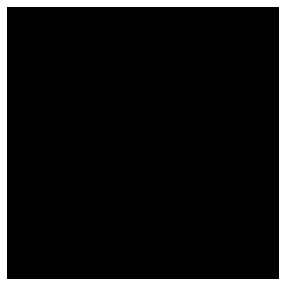

In [2]:
# Use this to normalize the input vector and return it as a unit vector.
def normalize(vector):
    return vector / np.linalg.norm(vector)

# TODO SPHERE-RAY INTERSECTION
#
# Compute and return the t value for our ray function:
#     R(t) = aperture + ray_vector * t
# that satisfies our ray-sphere intersection.
# 
# Use the quadratic solve as discussed in lecture to compute the t value
# for the intersection point. Remember when using the quadratic formula
# you can have 2 solutions, 1 repeated solution, or imaginary solutions.
# (Hint: Imaginary solutions happen when you're about to take the square
#  root of a negative value.)
# 
# Make sure to handle every case and return the appropriate t value for
# the intersection point if there is an intersection, else return None.
def ray_sphere_intersect(aperture, ray_vector, sphere_center, sphere_radius):
    # TODO: write your code for the ray-sphere intersection in this function
    
    # END TODO SPHERE-RAY INTERSECTION
    
    return None # return None if no intersection

# camera position
camera_aperture = np.array([0, 0, 1])

# coordinates defining our near cutting plane
z_near = 0
near_plane = {
    'top_left': np.array([-1, 1, z_near]),
    'top_right': np.array([1, 1, z_near]),
    'bot_left': np.array([-1, -1, z_near]),
    'bot_right': np.array([1, -1, z_near])
}

# our objects in the scene
objects = [
    # green sphere
    { 'center': np.array([0, 0, -5]), 'radius': 2,
      'ambient': np.array([0, 0.1, 0]), 'diffuse': np.array([0, 0.6, 0]),
      'specular': np.array([1, 1, 1]), 'shininess': 100},
    # red sphere
    { 'center': np.array([-1, 0, -1]), 'radius': 0.5,
      'ambient': np.array([0.1, 0, 0]), 'diffuse': np.array([0.6, 0, 0]),
      'specular': np.array([1, 1, 1]), 'shininess': 100},
    # yellow sphere
    { 'center': np.array([1, 0.5, -1.5]), 'radius': 0.4,
      'ambient': np.array([0.1, 0.1, 0]), 'diffuse': np.array([1, 0.6, 0]),
      'specular': np.array([1, 1, 1]), 'shininess': 100},
    # for the purposes of this HW, we make a giant sphere to fake a floor plane
    { 'center': np.array([0, -100000, 0]), 'radius': 99990,
      'ambient': np.array([0.1, 0.1, 0.1]), 'diffuse': np.array([0.2, 0.2, 0.2]),
      'specular': np.array([1, 1, 1]), 'shininess': 100}
]

# our lights in the scene
lights = [
    # medium white light at camera
    {'position': np.array([0, 0, 1]), 'color': np.array([0.6, 0.6, 0.6])},
    # strong white light from an angle
    {'position': np.array([2, 2, 2]), 'color': np.array([0.8, 0.8, 0.8])},
    # very strong blue light from an angle
    {'position': np.array([-1, 3, 3]), 'color': np.array([0, 0, 1])}
]

# resolution of image; feel free to adjust
screen_width = 200
screen_height = 200
# film plane of pixels (of RGB values) that we compute for our image
rendered_image = np.zeros((screen_width, screen_height, 3))

# loop over each pixel
for i, y in enumerate(np.linspace(near_plane['top_left'][1],
                                  near_plane['bot_left'][1],
                                  screen_height)):
    # print every 10 rows of pixels to indicate progress
    if i % 10 == 0:
        print("Processing row %d of %d..." % (i + 1, screen_height))
    for j, x in enumerate(np.linspace(near_plane['top_left'][0],
                                      near_plane['top_right'][0],
                                      screen_width)):
        # compute pixel coordinate
        pixel_center = np.array([x, y, z_near])
        # compute ray direction
        ray_vector = normalize(pixel_center - camera_aperture)
        
        # define a color variable to accumulate contribution from each light
        color = np.zeros((3))
        
        # loop over each light
        for light in lights:
            # START REFERENCE
            # variable to store our closest hit object if any
            hit_obj = None
            # variable to store the t to our hit object if any
            hit_t = np.inf
            # loop over each object
            for obj in objects:
                # use our ray-sphere intersection function to compute t
                obj_t = ray_sphere_intersect(camera_aperture, ray_vector,
                                             obj['center'], obj['radius'])
                # if this hit object is closer than our previous hit object
                if obj_t and obj_t < hit_t:
                    # set our closest hit object and the t value to this one
                    hit_obj = obj
                    hit_t = obj_t
            
            # if no object is hit by this light, move on to the next light
            if hit_obj is None:
                break
            # END REFERENCE

            # TODO INTERSECTION POINT
            # 
            # Compute the intersection point using our ray equation. Recall:
            #     R(t) = A + (P - A)t
            # where A is our camera aperture, (P - A) is our ray direction,
            # and t is the value that takes us to the intersection point
            # along our ray.
            # (Hint: All the variables that you need for this computation
            #  have already been computed for you above. You just need to
            #  piece them all together.)
            intersection = None # replace this line with your computation
            
            # END TODO INTERSECTION POINT
            
            # compute normal at intersection point for a sphere
            normal = normalize(intersection - hit_obj['center'])
            
            # TODO SHADOW RAYS
            # 
            # Cast a shadow ray from the intersection point to the light. You will
            # first need to compute the shadow ray's origin as well as the shadow
            # ray's direction. Remember to account for spurious self-occlusions!
            # 
            # From there, use the code above in the:
            # #START REFERENCE
            # ...
            # #END REFERENCE
            # block as a reference to write your own code for finding whether the
            # shadow ray intersects one of our sphere objects.
            # (Hint: You may find the light_dist variable that we computed useful.)
            # 
            # We have provided you some skeleton code to get started. Feel free to
            # uncomment and edit it however you like up to the END TODO.
            light_dist = np.linalg.norm(light['position'] - intersection)
            
            # is_shadowed = False
            # for blocking_obj in objects:
            # ...
            #         is_shadowed = True
            # ...
            # if is_shadowed:
            #     break # stop processing this light if the object is in shadow
            
            # END TODO SHADOW RAYS
            
            # ambient color using the Blinn-Phong BRDF
            ambient = hit_obj['ambient'] * light['color']
            
            # specular color using the Blinn-Phong BRDF
            V = normalize(camera_aperture - intersection)
            L = normalize(light['position'] - intersection)
            H = normalize(L + V)
            specular = hit_obj['specular'] * light['color'] \
                           * max(0, np.dot(normal, H) ** hit_obj['shininess'])
            
            # TODO DIFFUSE BRDF
            # 
            # Compute the diffuse color for our pixel. The lighting equation for
            # this has the form (in plain English):
            #     diffuse = BRDF for diffuse * light color * cosine of tilt angle
            # 
            # You can simply use the hit object's diffuse color component as the
            # BRDF response function. Look at the code above for the ambient and
            # specular lighting computations to get an idea of how to access the
            # diffuse color component for hit_obj.
            # 
            # For computing the cosine of the tilt angle between the surface at
            # the intersection point and the light, think back to dot products.
            # (Hint: The normal vector will come in handy.)
            diffuse = np.array([0, 0, 0]) # replace this line with your computation
            # END TODO DIFFUSE BRDF
            
            # add the contribution of this iteration's light to the pixel color
            color += ambient + diffuse + specular
            
        # color the pixel with the color we computed, clipping it between 0 and 1
        rendered_image[i, j] = np.clip(color, 0, 1)

print("Processed all %d rows of our image!" % (screen_height))
plt.imsave('images/output.png', rendered_image)
show_image("images/output.png", height = 5, width = 5)

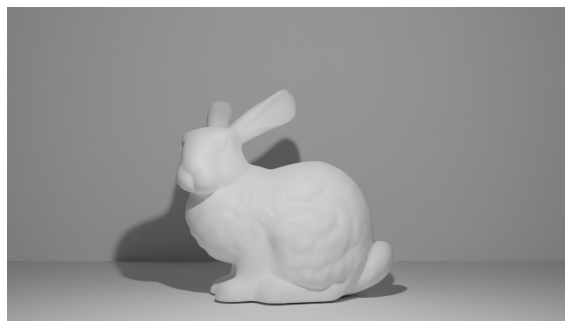

In [3]:
# TODO POINT LIGHT
# Edit to display your render using just a point light
show_image("images/point_light_example.png",height=6,width=10)

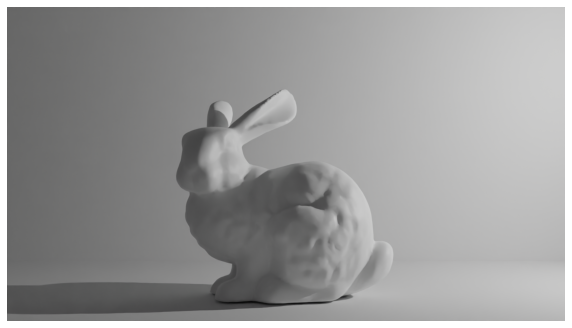

In [4]:
# TODO AREA LIGHT
# Edit to display your render using just an area light
show_image("images/area_light_example.png",height=6,width=10)

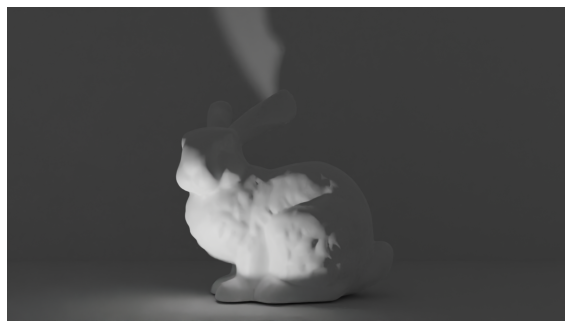

In [5]:
# TODO SPOTLIGHT
# Edit to display your render using just a spotlight
show_image("images/spotlight_example.png",height=6,width=10)

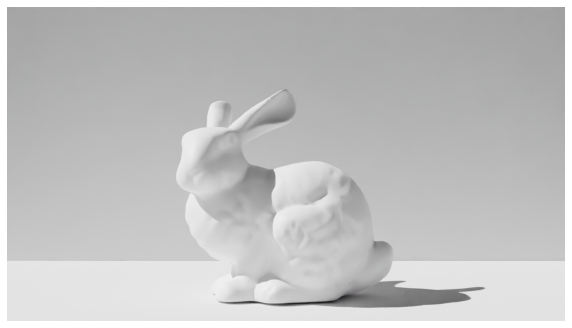

In [6]:
# TODO DIRECTIONAL LIGHT
# Edit to display your render using just a directional light
show_image("images/directional_light_example.png",height=6,width=10)

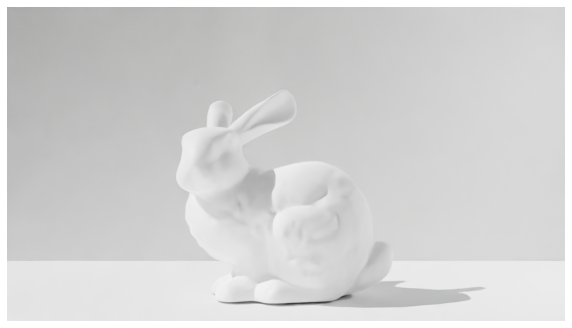

In [7]:
# TODO ALL LIGHTS
# Edit to display your render using all types of light
show_image("images/all_lights.png",height=6,width=10)